In [1]:
import zipfile
import multiprocessing as mp
import tqdm
import os

import pandas as pd
import matplotlib.pyplot as plt
import h5py
import cv2
import numpy as np 


## Extract data from zipfile

In [6]:
import zipfile
import os

def extract_zip(zip_file_path: str, extract_to_directory: str):
    """
    Extracts a ZIP file to a specified directory if the files do not already exist.

    Parameters:
        zip_file_path (str): Path to the ZIP file.
        extract_to_directory (str): Directory where the ZIP file will be extracted.
    """
    # Check if extraction directory already contains files from the ZIP
    extracted_files = [os.path.join(extract_to_directory, name) for name in zipfile.ZipFile(zip_file_path, 'r').namelist()]
    files_already_exist = all(os.path.exists(file) for file in extracted_files)

    if not files_already_exist:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to_directory)
        print(f"Extracted {zip_file_path} to {extract_to_directory}")
    else:
        print(f"Files already extracted to {extract_to_directory}. Skipping extraction.")

def remove_file(file_path: str):
    """
    Removes a file from the filesystem.

    Parameters:
        file_path (str): Path to the file to be removed.
    """
    os.remove(file_path)
    print(f"Removed {file_path}")

# Paths
zip_file_path = "../data/raw/train-metadata.zip"
extract_to_directory = "../data/raw/"

# Extract the ZIP file if needed
extract_zip(zip_file_path, extract_to_directory)

# Optionally, remove the ZIP file after extraction
remove_file(zip_file_path)


Extracted ../data/raw/train-metadata.zip to ../data/raw/
Removed ../data/raw/train-metadata.zip


## Load Metadata

In [7]:
df_metadata = pd.read_csv("../data/raw/train-metadata.csv")
df_metadata.head(10)

C:\Users\sohka\AppData\Local\Temp\ipykernel_2280\1128991036.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df_metadata = pd.read_csv("../data/raw/train-metadata.csv")


,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510
5,ISIC_0035502,0,IP_3026693,75.0,female,head/neck,2.54,TBP tile: close-up,3D: white,22.129183,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.619603
6,ISIC_0051648,0,IP_0218255,65.0,male,upper extremity,3.74,TBP tile: close-up,3D: XP,14.319188,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.918133
7,ISIC_0051665,0,IP_7734648,50.0,male,posterior torso,4.31,TBP tile: close-up,3D: XP,20.102610,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.972390
8,ISIC_0051710,0,IP_1307115,50.0,male,anterior torso,3.17,TBP tile: close-up,3D: white,14.166805,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.818963
9,ISIC_0051758,0,IP_2180091,60.0,female,upper extremity,3.97,TBP tile: close-up,3D: XP,16.251490,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999690


In [8]:
def df_stats(df: pd.DataFrame, include_all: bool = False):
    """
    Print statistics and null value counts for a pandas DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
        include_all (bool): If True, include all columns in the descriptive statistics; otherwise, include only numeric columns.

    Returns:
        None
    """
    if df.empty:
        print("The DataFrame is empty.")
        return

    # Print descriptive statistics
    print("Descriptive Statistics:")
    if include_all:
        print(df.describe(include='all'))
    else:
        print(df.describe(include=[np.number]))
    print("\n" + "-"*50 + "\n")  # Separator for clarity

    # Print the number of null values per column
    print("Null Value Counts:")
    print(df.isnull().sum())
    print("\n" + "-"*50 + "\n")  # Separator for clarity

    # Additional information: Percentage of null values per column
    print("Percentage of Null Values:")
    print(df.isnull().mean() * 100)
    print("\n" + "-"*50 + "\n")  # Separator for clarity

    # Number of rows and columns
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    print("\n" + "-"*50 + "\n")  # Separator for clarity

In [5]:
df_stats(df_metadata)

Descriptive Statistics:
              target     age_approx  clin_size_long_diam_mm       tbp_lv_A  \
count  401059.000000  398261.000000           401059.000000  401059.000000   
mean        0.000980      58.012986                3.930827      19.974007   
std         0.031288      13.596165                1.743068       3.999489   
min         0.000000       5.000000                1.000000      -2.487115   
25%         0.000000      50.000000                2.840000      17.330821   
50%         0.000000      60.000000                3.370000      19.801910   
75%         0.000000      70.000000                4.380000      22.304628   
max         1.000000      85.000000               28.400000      48.189610   

         tbp_lv_Aext       tbp_lv_B    tbp_lv_Bext       tbp_lv_C  \
count  401059.000000  401059.000000  401059.000000  401059.000000   
mean       14.919247      28.281706      26.913015      34.786341   
std         3.529384       5.278676       4.482994       5.708469 

 ## Load Image Byte String

In [4]:
import h5py

def load_image_from_hdf5(isic_id: str,
                         file_path: str = "../data/raw/train-image.hdf5",
                         n_channels: int = 3):
    # Handle the case where the isic_id is passed incorrectly
    if not isic_id.lower().startswith("isic"):
        isic_id = f"ISIC_{int(str(isic_id).split('_', 1)[-1]):>07}"
        
    # Open the HDF5 file in read mode
    with h5py.File(file_path, 'r') as hf:
        
        # Retrieve the image data from the HDF5 dataset using the provided ISIC ID
        try:
            image_data = hf[isic_id][()]
        except KeyError:
            raise KeyError(f"ISIC ID {isic_id} not found in HDF5 file.")

        # Convert the binary data to a numpy array
        image_array = np.frombuffer(image_data, np.uint8)

        # Decode the image from the numpy array
        if n_channels == 3:
            # Load the image as a color image (BGR) and convert to RGB
            image = cv2.cvtColor(cv2.imdecode(image_array, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
        else:
            # Load the image as a grayscale image
            image = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)

        # If the image failed to load for some reason (problems decoding) ...
        if image is None:
            raise ValueError(f"Could not decode image for ISIC ID: {isic_id}")
        
        return image


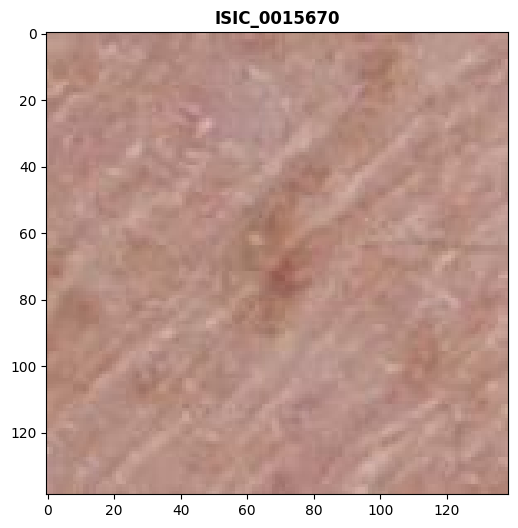

In [88]:
plt.figure(figsize=(6,6))
plt.title("ISIC_0015670", fontweight="bold")
plt.imshow(load_image_from_hdf5("ISIC_0015670"))
plt.show()

In [89]:
import cv2
import numpy as np

image =load_image_from_hdf5("ISIC_0015670")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
# Apply threshold to get a binary image
_, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
    
# Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Assuming we are interested in the largest contour
largest_contour = max(contours, key=cv2.contourArea)









In [91]:
gray 

array([[146, 146, 146, ..., 155, 154, 154],
       [150, 149, 149, ..., 153, 153, 152],
       [156, 155, 154, ..., 148, 147, 147],
       ...,
       [153, 148, 141, ..., 131, 132, 133],
       [152, 147, 141, ..., 131, 132, 133],
       [150, 146, 140, ..., 131, 131, 132]], dtype=uint8)

In [92]:
binary 

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

(-0.5, 138.5, 138.5, -0.5)

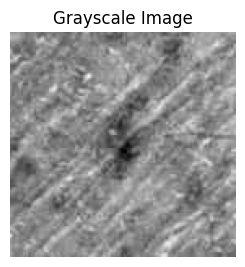

In [93]:
plt.subplot(1, 2, 1)
plt.title('Grayscale Image')
plt.imshow(gray, cmap='gray')
plt.axis('off')

(-0.5, 138.5, 138.5, -0.5)

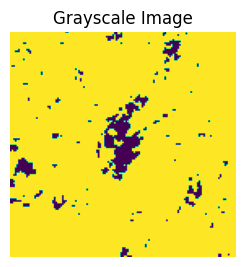

In [94]:
plt.subplot(1, 2, 1)
plt.title('Grayscale Image')
plt.imshow(binary )
plt.axis('off')

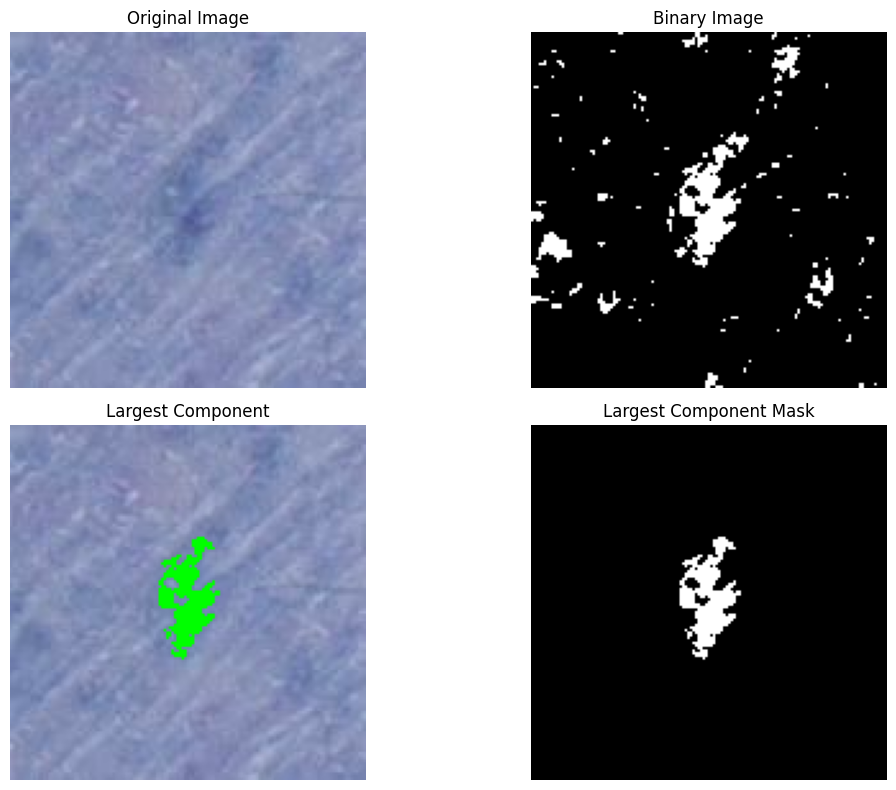

In [95]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_and_display_largest_connected_component(image):
    # Load the image
 
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply threshold to get a binary image
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)  # Invert binary to get black areas as white
    
    # Find connected components
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary, connectivity=8)
    
    # Find the largest connected component (excluding the background)
    areas = stats[1:, cv2.CC_STAT_AREA]  # Ignore the first component which is the background
    if areas.size > 0:
        largest_label = np.argmax(areas) + 1  # Add 1 to account for background
        largest_component = (labels == largest_label).astype(np.uint8) * 255
        
        # Create a copy of the original image to draw the largest component
        result_image = image.copy()
        result_image[largest_component > 0] = [0, 255, 0]  # Draw largest component in green
        
        return image, binary, result_image, largest_component
    else:
        print("No connected components found.")
        return image, binary, None, None

# Example usage
image_path = 'path_to_your_image.jpg'  # Replace with your image path
original_image, binary_image, largest_component_image, largest_component_mask = find_and_display_largest_connected_component(image)

# Show results
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Binary Image')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Largest Component')
if largest_component_image is not None:
    plt.imshow(cv2.cvtColor(largest_component_image, cv2.COLOR_BGR2RGB))
else:
    plt.text(0.5, 0.5, 'No Component Found', fontsize=12, ha='center')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Largest Component Mask')
if largest_component_mask is not None:
    plt.imshow(largest_component_mask, cmap='gray')
else:
    plt.text(0.5, 0.5, 'No Mask Found', fontsize=12, ha='center')
plt.axis('off')

plt.tight_layout()
plt.show()


/tmp/ipykernel_1507033/3550188767.py:41: RuntimeWarning: invalid value encountered in sqrt
  eccentricity = np.sqrt(1 - ratio ** 2)


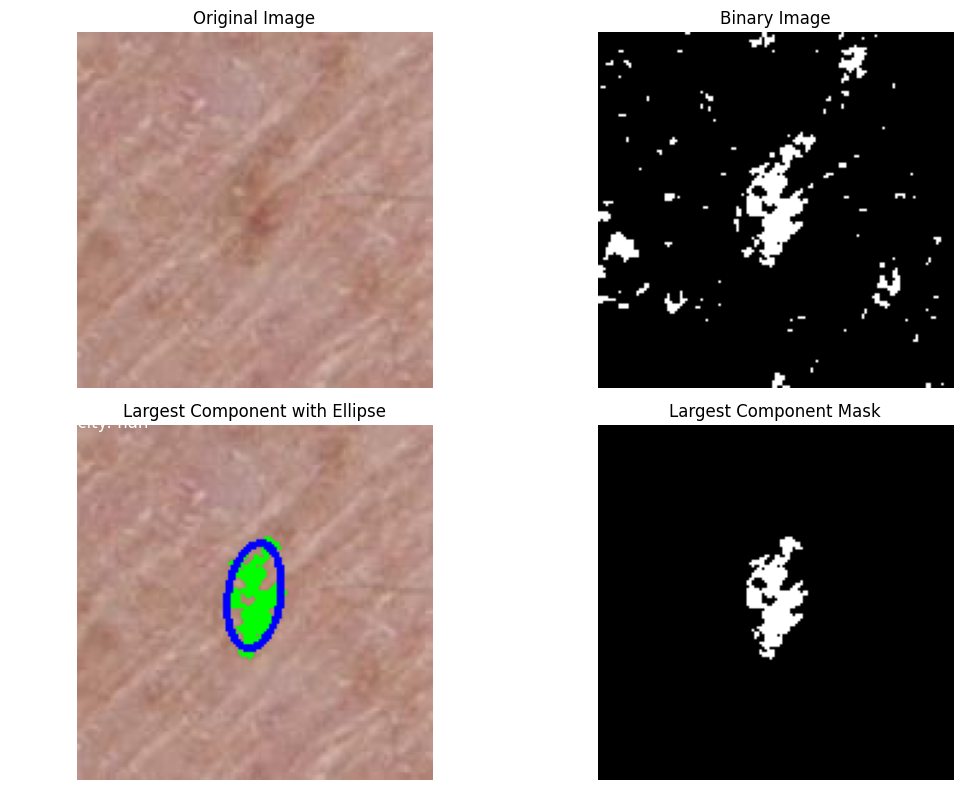

In [102]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_and_display_largest_connected_component(image):
    # Load the image
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply threshold to get a binary image
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)  # Invert binary to get black areas as white
    
    # Find connected components
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary, connectivity=8)
    
    # Find the largest connected component (excluding the background)
    areas = stats[1:, cv2.CC_STAT_AREA]  # Ignore the first component which is the background
    if areas.size > 0:
        largest_label = np.argmax(areas) + 1  # Add 1 to account for background
        largest_component = (labels == largest_label).astype(np.uint8) * 255
        
        # Create a binary image for contour detection
        largest_component_binary = (largest_component > 0).astype(np.uint8)
        contours, _ = cv2.findContours(largest_component_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        if contours:
            largest_contour = max(contours, key=cv2.contourArea)
            
            # Calculate the ellipse and eccentricity
            if len(largest_contour) >= 5:
                ellipse = cv2.fitEllipse(largest_contour)
                (x, y), (MA, ma), angle = ellipse
                
                # Semi-major and semi-minor axes
                semi_major_axis = MA / 2
                semi_minor_axis = ma / 2
                
                # Ensure semi-major axis is not zero and calculate eccentricity
                if semi_major_axis > 0 and semi_minor_axis > 0:
                    ratio = semi_minor_axis / semi_major_axis
                    eccentricity = np.sqrt(1 - ratio ** 2)
                    # Clamp the value to avoid invalid values
                    eccentricity = np.clip(eccentricity, 0, 1)
                else:
                    eccentricity = None
            else:
                eccentricity = None
            
            # Draw the largest component and ellipse on the original image
            result_image = image.copy()
            result_image[largest_component > 0] = [0, 255, 0]  # Draw largest component in green
            
            if eccentricity is not None:
                # Draw ellipse
                cv2.ellipse(result_image, ellipse, (0, 0, 255), 2)  # Red ellipse
                
            return image, binary, result_image, largest_component, eccentricity
        else:
            return image, binary, None, None, None
    else:
        return image, binary, None, None, None

# Example usage
image_path = 'path_to_your_image.jpg'  # Replace with your image path
original_image, binary_image, largest_component_image, largest_component_mask, eccentricity = find_and_display_largest_connected_component(image)

# Show results
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(original_image)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Binary Image')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Largest Component with Ellipse')
if largest_component_image is not None:
    plt.imshow(largest_component_image)
    if eccentricity is not None:
        plt.text(0.5, 0.9, f'Eccentricity: {eccentricity:.2f}', fontsize=12, color='white', ha='center')
else:
    plt.text(0.5, 0.5, 'No Component Found', fontsize=12, ha='center')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Largest Component Mask')
if largest_component_mask is not None:
    plt.imshow(largest_component_mask, cmap='gray')
else:
    plt.text(0.5, 0.5, 'No Mask Found', fontsize=12, ha='center')
plt.axis('off')

plt.tight_layout()
plt.show()


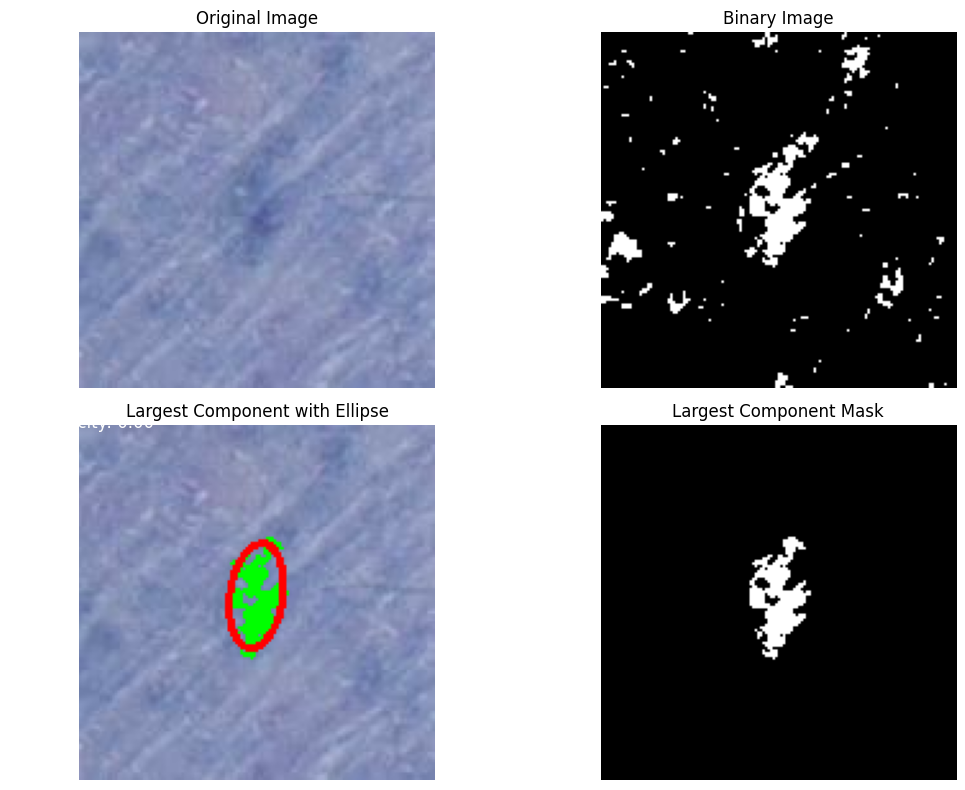

In [104]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_and_display_largest_connected_component(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply binary thresholding
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)
    
    # Find connected components
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary, connectivity=8)
    
    # Find the largest connected component
    areas = stats[1:, cv2.CC_STAT_AREA]
    if areas.size > 0:
        largest_label = np.argmax(areas) + 1
        largest_component = (labels == largest_label).astype(np.uint8) * 255
        
        # Create a binary image for contour detection
        largest_component_binary = (largest_component > 0).astype(np.uint8)
        contours, _ = cv2.findContours(largest_component_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        if contours:
            largest_contour = max(contours, key=cv2.contourArea)
            
            # Calculate ellipse and eccentricity
            if len(largest_contour) >= 5:
                ellipse = cv2.fitEllipse(largest_contour)
                (x, y), (MA, ma), angle = ellipse
                
                # Semi-major and semi-minor axes
                semi_major_axis = MA / 2
                semi_minor_axis = ma / 2
                
                # Ensure semi-major axis is not zero and calculate eccentricity
                if semi_major_axis > 0 and semi_minor_axis > 0:
                    ratio = semi_minor_axis / semi_major_axis
                    # Clamp ratio to avoid invalid values inside sqrt
                    ratio = np.clip(ratio, 0, 1)
                    eccentricity = np.sqrt(1 - ratio ** 2)
                else:
                    eccentricity = None
            else:
                eccentricity = None
            
            # Draw largest component and ellipse on the original image
            result_image = image.copy()
            result_image[largest_component > 0] = [0, 255, 0]
            
            if eccentricity is not None:
                cv2.ellipse(result_image, ellipse, (0, 0, 255), 2)
            
            return image, binary, result_image, largest_component, eccentricity
        else:
            return image, binary, None, None, None
    else:
        return image, binary, None, None, None

# Example usage

original_image, binary_image, largest_component_image, largest_component_mask, eccentricity = find_and_display_largest_connected_component(image)

# Show results
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Binary Image')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Largest Component with Ellipse')
if largest_component_image is not None:
    plt.imshow(cv2.cvtColor(largest_component_image, cv2.COLOR_BGR2RGB))
    if eccentricity is not None:
        plt.text(0.5, 0.9, f'Eccentricity: {eccentricity:.2f}', fontsize=12, color='white', ha='center')
else:
    plt.text(0.5, 0.5, 'No Component Found', fontsize=12, ha='center')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Largest Component Mask')
if largest_component_mask is not None:
    plt.imshow(largest_component_mask, cmap='gray')
else:
    plt.text(0.5, 0.5, 'No Mask Found', fontsize=12, ha='center')
plt.axis('off')

plt.tight_layout()
plt.show()



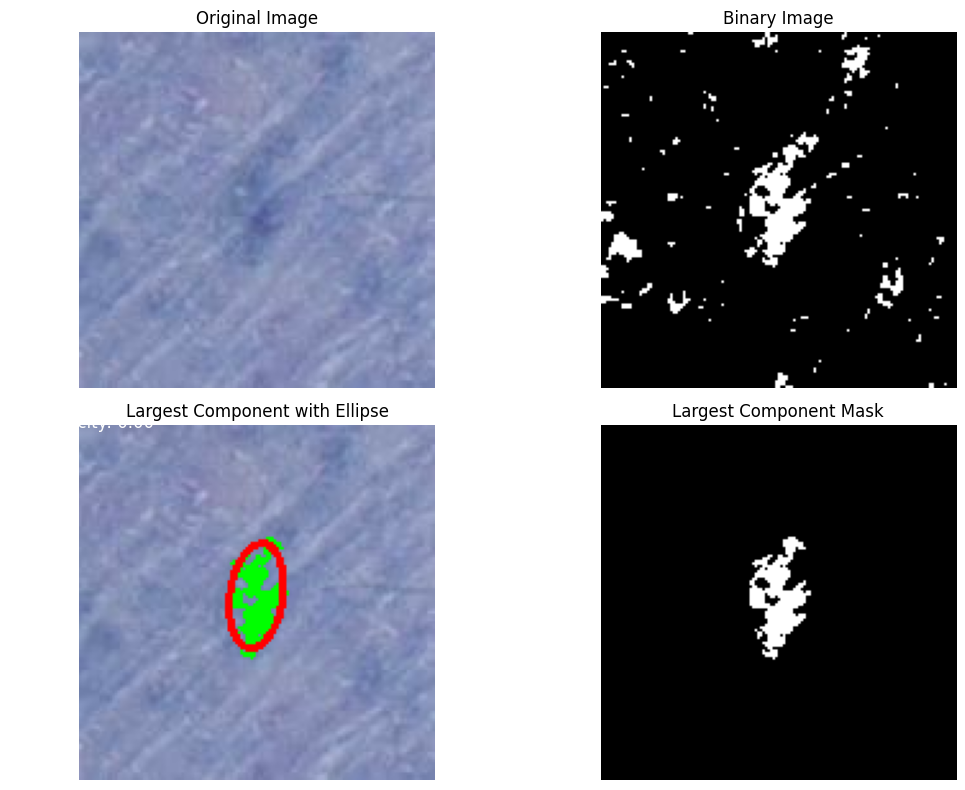

In [106]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_and_display_largest_connected_component(image):
    # Load the image
  
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply binary thresholding
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)
    
    # Find connected components
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary, connectivity=8)
    
    # Find the largest connected component
    areas = stats[1:, cv2.CC_STAT_AREA]
    if areas.size > 0:
        largest_label = np.argmax(areas) + 1
        largest_component = (labels == largest_label).astype(np.uint8) * 255
        
        # Create a binary image for contour detection
        largest_component_binary = (largest_component > 0).astype(np.uint8)
        contours, _ = cv2.findContours(largest_component_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        if contours:
            largest_contour = max(contours, key=cv2.contourArea)
            
            # Calculate ellipse and eccentricity
            if len(largest_contour) >= 5:
                ellipse = cv2.fitEllipse(largest_contour)
                (x, y), (MA, ma), angle = ellipse
                
                # Semi-major and semi-minor axes
                semi_major_axis = MA / 2
                semi_minor_axis = ma / 2
                
                # Ensure semi-major axis is not zero and calculate eccentricity
                if semi_major_axis > 0 and semi_minor_axis > 0:
                    ratio = semi_minor_axis / semi_major_axis
                    # Clamp ratio to avoid invalid values inside sqrt
                    ratio = np.clip(ratio, 0, 1)
                    eccentricity = np.sqrt(1 - ratio ** 2)
                else:
                    eccentricity = None
            else:
                eccentricity = None
            
            # Draw largest component and ellipse on the original image
            result_image = image.copy()
            result_image[largest_component > 0] = [0, 255, 0]
            
            if eccentricity is not None:
                # Draw ellipse
                cv2.ellipse(result_image, ellipse, (0, 0, 255), 2)
            
            return image, binary, result_image, largest_component, eccentricity
        else:
            return image, binary, None, None, None
    else:
        return image, binary, None, None, None

# Example usage

original_image, binary_image, largest_component_image, largest_component_mask, eccentricity = find_and_display_largest_connected_component(image)

# Show results
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Binary Image')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Largest Component with Ellipse')
if largest_component_image is not None:
    plt.imshow(cv2.cvtColor(largest_component_image, cv2.COLOR_BGR2RGB))
    if eccentricity is not None:
        plt.text(0.5, 0.9, f'Eccentricity: {eccentricity:.2f}', fontsize=12, color='white', ha='center')
else:
    plt.text(0.5, 0.5, 'No Component Found', fontsize=12, ha='center')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Largest Component Mask')
if largest_component_mask is not None:
    plt.imshow(largest_component_mask, cmap='gray')
else:
    plt.text(0.5, 0.5, 'No Mask Found', fontsize=12, ha='center')
plt.axis('off')

plt.tight_layout()
plt.show()
